In [1]:
from google.colab import drive
drive.mount('/content/drive/')
# Ubah path menyesuaikan dengan path and
!ls "/content/drive/My Drive/pengolahancitra"

Mounted at /content/drive/
buah.jpg  upscale


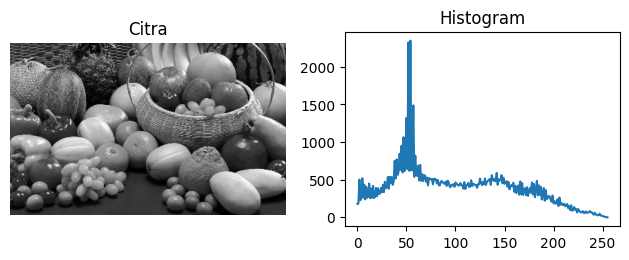

In [ ]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('/content/drive/My Drive/pengolahancitra/buah.jpg')
image = cv2.resize(image, (400, 250))
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# frekuensi antara 0-255
hist = cv2.calcHist([grey_image],[0],None,[256],[0,256])
# subplot(baris, kolom, index)
plt.subplot(221).set_title("Citra")
plt.axis("off")
# matplotlib menggunakan colormap
# saat membuat output, jadi gunakanlah
# cmap='gray', jika tidak, maka
# akan menampilkan nilai luminosity
# atau terangnya cahaya
plt.imshow( grey_image, cmap='gray' )
plt.subplot(222).set_title("Histogram")
plt.plot(hist)
plt.tight_layout()

plt.show()

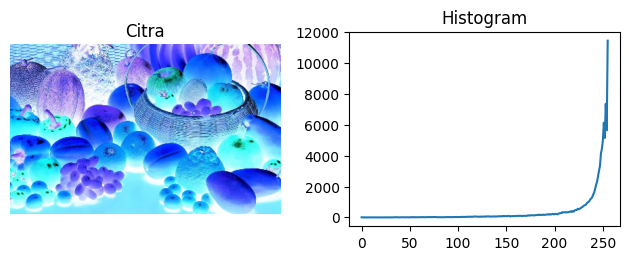

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/My Drive/pengolahancitra/buah.jpg')
image = cv2.resize(image, (400, 250))

# ubah ke negatif
negative_image = 255 - image

# hitung histogram dari gambar negatif
hist = cv2.calcHist([negative_image], [0], None, [256], [0,256])

# tampilkan hasil
plt.subplot(221).set_title("Citra")
plt.axis("off")
plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
plt.subplot(222).set_title("Histogram")
plt.plot(hist)
plt.tight_layout()
plt.show()

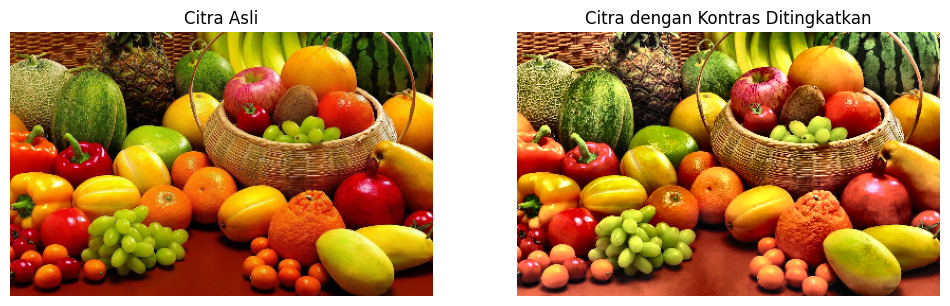

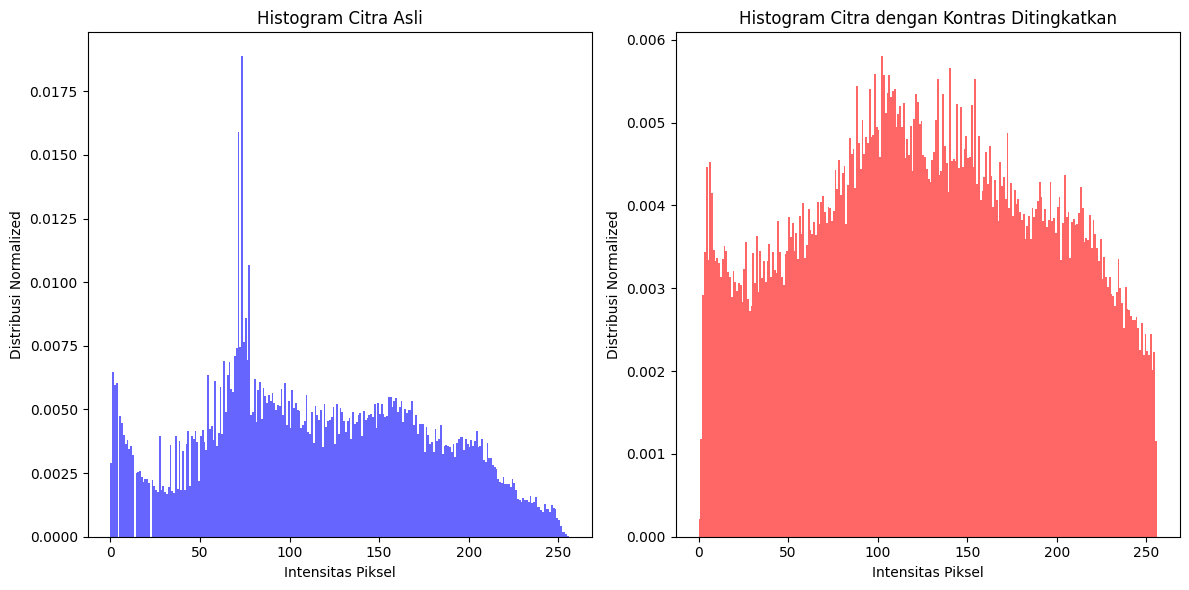

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/My Drive/pengolahancitra/buah.jpg')
image = cv2.resize(image, (400, 250))

# Ubah ke ruang warna LAB
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Memisahkan komponen L (luminance) dari LAB
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Menerapkan CLAHE (Contrast Limited Adaptive Histogram Equalization) pada komponen L
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
l_channel_eq = clahe.apply(l_channel)

# Gabungkan kembali komponen L yang telah ditingkatkan kontras dengan komponen A dan B
lab_image_eq = cv2.merge((l_channel_eq, a_channel, b_channel))

# Konversi kembali ke ruang warna RGB
enhanced_image = cv2.cvtColor(lab_image_eq, cv2.COLOR_LAB2BGR)

# Tampilkan gambar asli dan yang telah ditingkatkan kontras beserta histogramnya
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Tampilkan gambar asli
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')
axs[0].axis('off')

# Tampilkan gambar yang telah ditingkatkan kontras
axs[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Citra dengan Kontras Ditingkatkan')
axs[1].axis('off')

# Tampilkan histogram sebelum dan sesudah peningkatan kontras
plt.figure(figsize=(12, 6))

# Histogram sebelum peningkatan kontras
plt.subplot(121)
plt.hist(l_channel.flatten(), bins=256, range=(0, 256), density=True, color='b', alpha=0.6)
plt.title('Histogram Citra Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Distribusi Normalized')

# Histogram setelah peningkatan kontras
plt.subplot(122)
plt.hist(l_channel_eq.flatten(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
plt.title('Histogram Citra dengan Kontras Ditingkatkan')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Distribusi Normalized')

plt.tight_layout()
plt.show()

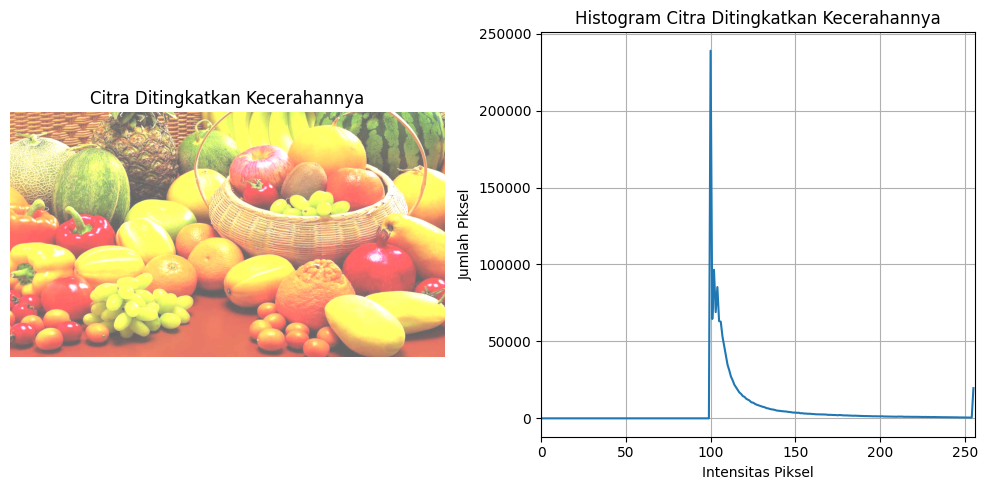

In [12]:

import cv2
from matplotlib import pyplot as plt

image_path = '/content/drive/My Drive/pengolahancitra/buah.jpg'
img = cv2.imread(image_path)

brightness_value = 100
brightness_array = np.full(img.shape, brightness_value, dtype=np.uint8)
brighter_img = cv2.add(img, brightness_array)
hist = cv2.calcHist([brighter_img], [0], None, [256], [0, 256])
plt.figure(figsize=(10, 5))

# tampilkan gambar yang ditingkatkan kecerahannya
plt.subplot(121).set_title("Citra Ditingkatkan Kecerahannya")
plt.imshow(cv2.cvtColor(brighter_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# tampilkan histogram
plt.subplot(122).set_title("Histogram Citra Ditingkatkan Kecerahannya")
plt.plot(hist)
plt.xlim([0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.grid(True)

plt.tight_layout()
plt.show()

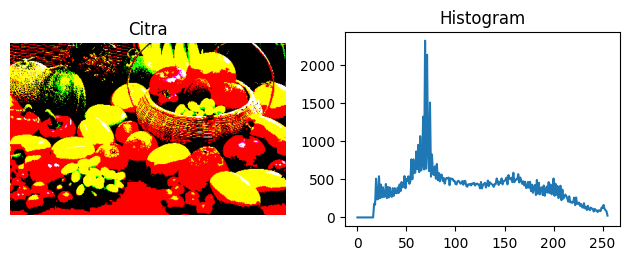

In [ ]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/My Drive/pengolahancitra/buah.jpg')
image = cv2.resize(image, (400, 250))

# apply thresholding
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# tampilkan citra
plt.subplot(221).set_title("Citra")
plt.axis("off")
plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))

# tampilkan histogram
plt.subplot(222).set_title("Histogram")
plt.plot(hist)
plt.tight_layout()

plt.show()